In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


In [2]:
import warnings
# 경고메시지 출력하지 않아요!
warnings.filterwarnings(action='ignore')

In [3]:
# data loading
df = pd.read_csv('./data/mnist_train.csv')
display(df)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# 데이터 전처리
# 결측치나 이상치 없음

# 정규화


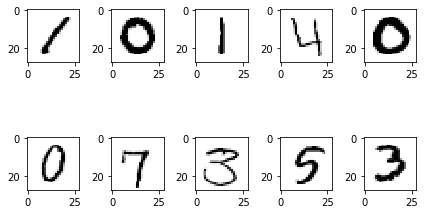

In [4]:
# 이미지 확인 
figure = plt.figure()
ax_arr = []   # python list

img_data = df.drop('label',axis=1,inplace=False).values
for n in range(10):
    ax_arr.append(figure.add_subplot(2,5,n+1))
    ax_arr[n].imshow(img_data[n].reshape(28,28),
                    cmap='Greys',            # 흑백이미지 표현
                    interpolation='nearest') # 보간법
plt.tight_layout()
plt.show()

In [5]:
# data split
train_x_data,test_x_data,train_t_data,test_t_data=train_test_split(df.drop('label',axis=1,inplace=False),
                                                                          df['label'],
                                                                          test_size=0.3,
                                                                          random_state=1,
                                                                          stratify=df['label'])

In [6]:
# 정규화
scaler = MinMaxScaler()
scaler.fit(train_x_data)

norm_train_x_data = scaler.transform(train_x_data)
norm_test_x_data = scaler.transform(test_x_data)

In [ ]:
# tensorflow
sess = tf.Session()
onehot_train_t_data = sess.run(tf.one_hot(train_t_data,depth=10))
onehot_test_t_data = sess.run(tf.one_hot(test_t_data,depth=10))

# placeholder
X = tf.placeholder(shape=[None,784],dtype=tf.float32)
T = tf.placeholder(shape=[None,10],dtype=tf.float32)

# weight, bias
W = tf.Variable(tf.random.normal([784,10]))
b = tf.Variable(tf.random.normal([10]))

# hypothesis, model
logit = tf.matmul(X,W) + b
H = tf.nn.softmax(logit)

# loss function
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logit,
                                                                labels=T))

# train
train = tf.train.GradientDescentOptimizer(learning_rate=1e-1).minimize(loss)

# session. 초기화
sess.run(tf.global_variables_initializer())

# 반복학습
num_of_epoch = 1000
batch_size = 100

for step in range(num_of_epoch):
    total_batch = int(norm_train_x_data.shape[0]/batch_size)
    
    for i in range(total_batch):
        batch_x = norm_train_x_data[i*batch_size:(i+1)*batch_size]
        batch_y = onehot_train_t_data[i*batch_size:(i+1)*batch_size]
        
        _,loss_val = sess.run([train,loss],feed_dict={X:batch_x,
                                                     T:batch_y})
    if step % 100 ==0:
        print('loss value : {}'.format(loss_val))

loss value : 1.2110148668289185


In [ ]:
# accuracy 측정
predict = tf.argmax(H,1)
correct = tf.equal(predict, tf.argmax(T,1))
accuracy = tf.reduce_mean(tf.cast(correct,dtype=tf.float32))

accuracy_val = sess.run(accuracy, feed_dict={X:norm_test_x_data,
                                            T:onehot_test_t_data})
print('Accurcy:{}'.format(accuracy_val))

In [1]:
# tensorflow 2.X 버전
import tensorflow as tf
print(tf.__version__)

AttributeError: type object 'h5py.h5.H5PYConfig' has no attribute '__reduce_cython__'

In [ ]:
W = tf.random.normal([1],dtype=tf.float32)

# 1.15버전에서 W의 값을 알아내려면 session을 통해서 node를 실행시켜서
# 값을 얻어야함, 2.X버전은 eager execution(즉시실행모드)를 지원함
# session 필요없고, 일반적인 프로그래밍 하는것처럼 사용가능
# placeholder도 삭제
print

In [ ]:
# keras 사용하기 
# keras model 만들기
import tensorflow as tf

model = tf.keras.models.Sequential()

# model.add()를 이용해서 layer를 추가
model.add('input layer')
model.add('output layer')

# loss의 종류와 optimizer종류를 설정
model.compile()

# 학습
model.fit()

# 평가와 predict
model.evaluate()   # => 모델평가
model.predict()    # => 예측값 도출

# 모델 저장
model.save()


In [2]:
# 대표적인 multinomial 예제인 MNIST를 이용해서 
# tensorflow 2.X 버전으로 구현

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.model import Sequential   # keras model
from tensorflow.keras.layers import Flatten, Dense # Flatten(input layer)
                                                    # Dense(output layer)
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

AttributeError: type object 'h5py.h5.H5PYConfig' has no attribute '__reduce_cython__'

In [3]:
# data loading
df = pd.read_csv('./data/mnist_train.csv')
display(df.head())

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# data split
train_x_data,test_x_data,train_t_data,test_t_data=\
train_test_split(df.drop('label',axis=1,inplace=False),
                 df['label'],
                 test_size=0.3,
                 random_state=1,
                 stratify=df['label'])

In [ ]:
# 정규화
scaler = MinMaxScaler()
scaler.fit(train_x_data)

norm_train_x_data = scaler.transform(train_x_data)
norm_test_x_data = scaler.transform(test_x_data)

In [ ]:
# tensorflow 2.x 구현 
model = Sequential()

print(norm_train_x_data.shape[1])

#layer추가
model.add(Flatten(input_shape=(norm_train_x_data.shape[1],)))

# output layer
model.add(Dense(units=10,activation='softmax'))

# input layer는 사실 하는 일이 없음, 그래서 코드를 나눠쓰지 않고 한번에 쓸수 있음 (나중에 할거임)
print(model.summary())

In [ ]:
# modele compile
# 사용할 loss 함수를 지정, 사용한 optimizer(알고리즘)을 지정
from tensorflow.keras.optimizers import SGD, Adam

# loss
# linear regression : linear regression의 loss (MSE)
# binary classification : binary_crossentropy
# muitinomial classification : categorical_crossenetropy(onehot encoding 처리를 해야함)
# muitinomial classification : sparse_categorical_crossenetropy(onehot encoding 처리 필요 없음)

model.compile(optimizer=SGD(learning_rate=1e-3),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 학습 결과를 변수에 저장
history = model.fit(norm_train_x_data, train_t_data, epochs=100. batch_size=100, verbose=1, validation_split=0.2)

In [ ]:
# 모델 최종 평가
print(model.evaluate(norm_test_x_data, test_t_data))


In [ ]:
# 이렇게 만든 모델을 저장해보자!
# 학습 한 후 모델이 메모리에 저장됨, 프로그램 종료시 다 날아감
# 다음날 다시 하려면 다시 학습해야됨 -> 시간이 오래걸려,,

# 모델 학습이 오래 걸리는 경우, 중간에 미리 저장해 놓고 거기서부터 재학습하기 가능

# 다른 사람과 모델 공유가능

# 저장할 때 2가지 방법이 있음
# 1. 모델을 저장할 때 모델 구조와 계산된 W,b를 같이 저장
#    장) 편함    단) 사이즈가 큼
# 2. 모델 구조는 저장하지 않고, W,b만 저장
#    장) 크기가 작음    단) 사용하려면 모델을 먼저 만들고 W,b를 로딩해야함